The Titanic dataset contains 12 columns as follows [1]:
- Passengerid: Passenger ID, dtype = integer. 
- Survived: Passenger survived (1 = Yes, 0 = No), dtype = integer.
- Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd), dtype = integer.
- Name: Passenger names, dtype = string.
- Sex: Passengers gender, dtype: string.
- Age: Passengers age, dtype: float.
- SibSp: Number of Siblings/Spouses, dtype = integer.
- Parch: Number of Parents/Children, dtype = integer.
- Ticket: Ticket numbers, dtype = string.
- Fare: Ticket price, dtype = float.
- Cabin: Cabin nubmbers.
- Embarked:  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton), dtype = string.

We are going to:
- Clean the data by removing any missing values. 
- Find the mean, median, mode, standard deviation, and variance of each numerical column.
- Find people who are their age is between 20 and 50 to calculate their weight. 
- Write Python code to generate a number of weights using normal distribution.
- Find the probability of having someone of a weight less than 50kg.
- Find the probability of having someone of a weight between 100kg and 120kg.
- Find the probability of having someone of a weight that’s exactly 77.7kg.



Data types:

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Missing values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 17 unique titles.

 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


Average age per title
Title
Dr          42.000000
Master       4.574167
Military    56.600000
Miss        21.845638
Mr          32.600737
Mrs         35.873874
Name: Age, dtype: float64

Missing values:

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibS

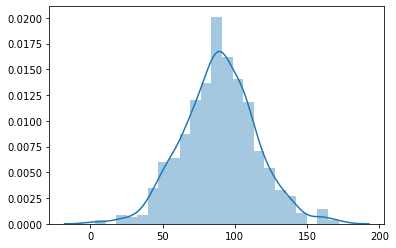

In [4]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


# upload Titanic dataset

df = pd.read_csv('https://raw.githubusercontent.com/Amal211/DS_level2/main/train.csv')

df.head()

# get the data types for each column
print('\nData types:\n\n{}\n' .format(df.dtypes))

missing_values = df.apply(lambda x: sum(x.isnull()), axis=0)    # find missing values
print('\nMissing values:\n\n{}\n' .format(missing_values))


# drop columns that are not useful in our analysis 
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

# replace missing values in 'Embarked' with the most frequent values
df['Embarked'].fillna(df['Embarked'].mode().iloc[0], inplace=True)

# create Title columns to help in dividing people into different age groups [1]
if ('Title' not in df.columns) :
    titles = pd.DataFrame(df.apply(lambda x: (x["Name"].split(",")[1].split(".")[0]).strip(), axis=1), columns=["Title"])
    
    # count how many titles and list them
    print("There are {} unique titles.".format(titles['Title'].nunique()))
    print("\n", titles['Title'].unique())
    print("\n")
 
    # group some of the titles together
    titles['Title'].replace(['Mr', 'Don', 'Rev','Sir', 'Jonkheer'], 'Mr', inplace=True)
    titles['Title'].replace(['Col', 'Capt', 'Major'],'Military', inplace=True)
    titles['Title'].replace(['Mrs', 'Mme', 'Lady', 'the Countess'],'Mrs', inplace=True)
    titles['Title'].replace(['Miss', 'Ms', 'Mlle'],'Miss', inplace=True)
    df = df.join(titles)

# show the mean age for each title to help in filling age missing values [1]
average_ages = df.groupby('Title')['Age'].mean()
print("Average age per title",average_ages,sep="\n")

# fill age missing value based on mean age of each title
df.loc[(df['Age'].isnull()) & (df['Title']=='Dr'),'Age']=average_ages.loc['Dr']
df.loc[(df['Age'].isnull()) & (df['Title']=='Master'),'Age']=average_ages.loc['Master']
df.loc[(df['Age'].isnull()) & (df['Title']=='Military'),'Age']=average_ages.loc['Military']
df.loc[(df['Age'].isnull()) & (df['Title']=='Miss'),'Age']=average_ages.loc['Miss']
df.loc[(df['Age'].isnull()) & (df['Title']=='Mr'),'Age']=average_ages.loc['Mr']
df.loc[(df['Age'].isnull()) & (df['Title']=='Mrs'),'Age']=average_ages.loc['Mrs']


missing_values = df.apply(lambda x: sum(x.isnull()), axis=0)    # check for missing values
print('\nMissing values:\n\n{}\n' .format(missing_values))

# find the mean, median, mode, standard deviation, 
# and variance of each numerical column in the dataset [2]

print('\nMean:\n{}\n' .format(df[['Age', 'Fare']].mean()))
print('\nMedian:\n{}\n' .format(df[['Age', 'Fare']].median()))
print('\nMode:\n{}\n' .format(df[['Age', 'Fare']].mode()))
print('\nStandard Deviation:\n{}\n' .format(df[['Age', 'Fare']].std()))
print('\nVariance:\n{}\n' .format(df[['Age', 'Fare']].var()))

# get people who are their age between 20 and 50, 
# to calculate adults weight 
adults = df[(df['Age'] >= 20) & (df['Age'] <= 50)].reset_index(drop=True)

# create 'Weight' column and fill it with random weight numbers
# using numpy random normal function that generate sample from normal distribution 
# with mean = 90, standars deviation = 25,
# and the number of adults their age between 20 and 50 is 659 [3]

Weight = np.random.normal(90, 25, 659)
adults['Weight'] = Weight

# the probability of having someone of a weight < 50kg [3]
# using scipy stats norm function that that generate normal random variables,
# then use cdf (Cumulative Distribution Function) to get the probability that
# X will be < or = to x.
# by using pdf (Probability Density Function) which "a function that describes the 
# relative probability of the values taken by the variable" [4]  

p = scipy.stats.norm(90, 25)
p1 = p.cdf(50)

# the probability of having someone of a weight that’s exactly 77.7kg.
p2 = p.pdf(77.7)

# the probability of having someone of a weight between 100kg and 120kg
p3 = p.cdf(120) - p.cdf(100) 

print('\nThe probability that a person weight is < 50kg: {}\n' .format(p1))
print('\nThe probability that a person weight is exactly 77.77kg: {}\n' .format(p2))
print('\nThe probability that a person weight is between 100 and 120kg: {}\n' .format(p3))

# show the Weight values distribution
sns.distplot(Weight)




                                                                     

References
[1] Kaustubh, S. (2019). Data analysis and visualization using Python - Titanic survivor dataset. Retrieved from
https://kaustubhsaha.postach.io/post/data-analysis-and-visualization-using-python-titanic-survivor-dataset
[2] Rachuta, K. (2016). Basic statistics in pandas DataFrame. Retrieved from https://medium.com/@kasiarachuta/basic-statistics-in-pandas-dataframe-594208074f85
[3] Brownlee, J. (2019). Continuous Probability Distributions for Machine Learning. Retrieved from https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/
[4] What is a density function?. (2014). Retrieved from https://stats.stackexchange.com/questions/86094/what-is-a-density-function
